<a href="https://colab.research.google.com/github/AtharvaChinchane/Sleep-and-Health-Visualization/blob/main/Sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.linalg as la


In [ ]:
sleep_dep=pd.read_csv('sleep_deprivation_dataset_detailed.csv')

In [ ]:
sleep_health=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
sleep_analysis=pd.read_csv('Sleep_Analysis.csv')

In [ ]:
sleep_dep.head()

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14


In [ ]:
sleep_health.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
sleep_analysis.head()

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time
0,22,Male,two,no,2hrs,yes,west,sometimes,no,Tea,6.7575
1,22,Female,three,no,3-4 hrs,no,south,no,no,Coffee,8.0000
2,23,Male,three,no,3-4 hrs,no,south,no,no,Tea,8.0000
3,23,Female,two,no,1-2 hrs,no,east,sometimes,no,Coffee,6.5000
4,22,Male,three,no,more than 5,yes,east,sometimes,yes,Tea and Coffee both,6.0000


In [11]:

# Rename columns in sleep_dep DataFrame
sleep_dep = sleep_dep.rename(columns={
    'Participant_ID': 'Participant ID',
    'Sleep_Hours': 'Sleep Hours',
    'Sleep_Quality_Score': 'Sleep Quality Score',
    'Daytime_Sleepiness': 'Daytime Sleepiness',
    'Stroop_Task_Reaction_Time': 'Stroop Task Reaction Time',
    'N_Back_Accuracy': 'N Back Accuracy',
    'Emotion_Regulation_Score': 'Emotion Regulation Score',
    'PVT_Reaction_Time': 'PVT Reaction Time',
    'Caffeine_Intake': 'Caffeine Intake',
    'Physical_Activity_Level': 'Physical Activity Level',
    'Stress_Level': 'Stress Level'
})

sleep_dep.head()


,Participant ID,Sleep Hours,Sleep Quality Score,Daytime Sleepiness,Stroop Task Reaction Time,N Back Accuracy,Emotion Regulation Score,PVT Reaction Time,Age,Gender,BMI,Caffeine Intake,Physical Activity Level,Stress Level
0,P1,5.0,8.0,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,9.0,6.0,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.0,8.0,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,7.0,7.0,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,4.0,10.0,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14


In [12]:

# Rename columns in sleep_health DataFrame
sleep_health = sleep_health.rename(columns={
    'Person ID': 'Participant ID',
    'Sleep Disorder': 'Sleep Disorder',
    'Occupation': 'Occupation',
    'Sleep Duration': 'Sleep Hours',
    'Quality of Sleep': 'Sleep Quality Score',
    'Physical Activity Level': 'Physical Activity Level',
    'Stress Level': 'Stress Level',
    'BMI Category': 'BMI Category',
    'Blood Pressure': 'Blood Pressure',
    'Heart Rate': 'Heart Rate',
    'Daily Steps': 'Daily Steps',
    'Sleep Disorder': 'Sleep Disorder'
})

sleep_health.head()

,Participant ID,Gender,Age,Occupation,Sleep Hours,Sleep Quality Score,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [13]:
sleep_analysis.head()

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time
0,22,Male,two,no,2hrs,yes,west,sometimes,no,Tea,6.7575
1,22,Female,three,no,3-4 hrs,no,south,no,no,Coffee,8.0000
2,23,Male,three,no,3-4 hrs,no,south,no,no,Tea,8.0000
3,23,Female,two,no,1-2 hrs,no,east,sometimes,no,Coffee,6.5000
4,22,Male,three,no,more than 5,yes,east,sometimes,yes,Tea and Coffee both,6.0000


In [14]:
sleep_dep['Sleep Quality Score'] = pd.to_numeric(sleep_dep['Sleep Quality Score'], errors='coerce')

# Scale 'Sleep Quality Score' to 0-10 and round
sleep_dep['Sleep Quality Score'] = (sleep_dep['Sleep Quality Score'] / sleep_dep['Sleep Quality Score'].max() * 10).round()

# Rounding 'Sleep Hours'
sleep_dep['Sleep Hours'] = sleep_dep['Sleep Hours'].round()

sleep_dep.head(15)


,Participant ID,Sleep Hours,Sleep Quality Score,Daytime Sleepiness,Stroop Task Reaction Time,N Back Accuracy,Emotion Regulation Score,PVT Reaction Time,Age,Gender,BMI,Caffeine Intake,Physical Activity Level,Stress Level
0,P1,5.0,8.0,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,9.0,6.0,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.0,8.0,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,7.0,7.0,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,4.0,10.0,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14
5,P6,4.0,6.0,6,2.84,58.80,46,224.48,28,Male,32.23,3,6,29
6,P7,3.0,4.0,18,3.16,50.90,31,201.56,22,Male,32.74,4,5,16
7,P8,8.0,7.0,21,3.28,74.69,66,388.37,29,Male,32.25,1,0,4
8,P9,7.0,6.0,1,1.74,58.94,38,258.28,20,Female,25.24,3,4,28
9,P10,7.0,0.0,9,2.61,68.32,23,221.28,18,Male,21.78,3,4,3


In [15]:
sleep_health['Sleep Hours'] = round(sleep_health['Sleep Hours'])
sleep_health['Sleep Quality Score'] = round(sleep_health['Sleep Quality Score'])
sleep_health.head(15)

,Participant ID,Gender,Age,Occupation,Sleep Hours,Sleep Quality Score,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.0,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.0,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.0,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,6.0,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,6.0,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,6.0,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.0,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,8.0,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,8.0,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,8.0,7,75,6,Normal,120/80,70,8000,NaN


In [16]:
sleep_dep.isnull().sum()

,0
Participant ID,0
Sleep Hours,0
Sleep Quality Score,0
Daytime Sleepiness,0
Stroop Task Reaction Time,0
N Back Accuracy,0
Emotion Regulation Score,0
PVT Reaction Time,0
Age,0
Gender,0


In [17]:
sleep_health.isnull().sum()

,0
Participant ID,0
Gender,0
Age,0
Occupation,0
Sleep Hours,0
Sleep Quality Score,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [18]:
sleep_analysis.isnull().sum()

,0
Age,0
Gender,0
meals/day,0
physical illness,0
screen time,0
bluelight filter,0
sleep direction,0
exercise,0
smoke/drink,0
beverage,0


In [19]:
sleep_dep=sleep_dep.drop('Participant ID',axis=1)

In [20]:
sleep_health=sleep_health.drop('Participant ID',axis=1)

In [21]:
sleep_dep.head()

,Sleep Hours,Sleep Quality Score,Daytime Sleepiness,Stroop Task Reaction Time,N Back Accuracy,Emotion Regulation Score,PVT Reaction Time,Age,Gender,BMI,Caffeine Intake,Physical Activity Level,Stress Level
0,5.0,8.0,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,9.0,6.0,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,7.0,8.0,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,7.0,7.0,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,4.0,10.0,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14


In [22]:
# Concatenate the DataFrames
sleep_combined = pd.concat([sleep_dep, sleep_health], axis=0, ignore_index=True)

sleep_combined.head(15)


,Sleep Hours,Sleep Quality Score,Daytime Sleepiness,Stroop Task Reaction Time,N Back Accuracy,Emotion Regulation Score,PVT Reaction Time,Age,Gender,BMI,Caffeine Intake,Physical Activity Level,Stress Level,Occupation,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,5.0,8.0,12.0,1.60,64.20,12.0,365.85,35,Female,30.53,2.0,1,33,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,6.0,14.0,2.54,65.27,21.0,288.95,20,Male,27.28,3.0,8,37,NaN,NaN,NaN,NaN,NaN,NaN
2,7.0,8.0,10.0,3.40,74.28,35.0,325.93,18,Male,30.00,1.0,2,32,NaN,NaN,NaN,NaN,NaN,NaN
3,7.0,7.0,3.0,3.54,72.42,25.0,276.86,18,Male,34.47,5.0,0,23,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,10.0,12.0,3.09,99.72,60.0,383.45,36,Male,29.70,3.0,4,14,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,6.0,6.0,2.84,58.80,46.0,224.48,28,Male,32.23,3.0,6,29,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,4.0,18.0,3.16,50.90,31.0,201.56,22,Male,32.74,4.0,5,16,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,7.0,21.0,3.28,74.69,66.0,388.37,29,Male,32.25,1.0,0,4,NaN,NaN,NaN,NaN,NaN,NaN
8,7.0,6.0,1.0,1.74,58.94,38.0,258.28,20,Female,25.24,3.0,4,28,NaN,NaN,NaN,NaN,NaN,NaN
9,7.0,0.0,9.0,2.61,68.32,23.0,221.28,18,Male,21.78,3.0,4,3,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
sleep_combined=sleep_combined.drop('BMI Category',axis=1)

In [24]:
# Define BMI categories based on BMI values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese Class I'
    elif 35 <= bmi < 40:
        return 'Obese Class II'
    else:
        return 'Obese Class III'

sleep_combined['BMI Category'] = sleep_combined['BMI'].apply(categorize_bmi)


In [26]:
sleep_combined.head(15)

,Sleep Hours,Sleep Quality Score,Daytime Sleepiness,Stroop Task Reaction Time,N Back Accuracy,Emotion Regulation Score,PVT Reaction Time,Age,Gender,BMI,Caffeine Intake,Physical Activity Level,Stress Level,Occupation,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI Category
0,5.0,8.0,12.0,1.60,64.20,12.0,365.85,35,Female,30.53,2.0,1,33,NaN,NaN,NaN,NaN,NaN,Obese Class I
1,9.0,6.0,14.0,2.54,65.27,21.0,288.95,20,Male,27.28,3.0,8,37,NaN,NaN,NaN,NaN,NaN,Overweight
2,7.0,8.0,10.0,3.40,74.28,35.0,325.93,18,Male,30.00,1.0,2,32,NaN,NaN,NaN,NaN,NaN,Obese Class I
3,7.0,7.0,3.0,3.54,72.42,25.0,276.86,18,Male,34.47,5.0,0,23,NaN,NaN,NaN,NaN,NaN,Obese Class I
4,4.0,10.0,12.0,3.09,99.72,60.0,383.45,36,Male,29.70,3.0,4,14,NaN,NaN,NaN,NaN,NaN,Overweight
5,4.0,6.0,6.0,2.84,58.80,46.0,224.48,28,Male,32.23,3.0,6,29,NaN,NaN,NaN,NaN,NaN,Obese Class I
6,3.0,4.0,18.0,3.16,50.90,31.0,201.56,22,Male,32.74,4.0,5,16,NaN,NaN,NaN,NaN,NaN,Obese Class I
7,8.0,7.0,21.0,3.28,74.69,66.0,388.37,29,Male,32.25,1.0,0,4,NaN,NaN,NaN,NaN,NaN,Obese Class I
8,7.0,6.0,1.0,1.74,58.94,38.0,258.28,20,Female,25.24,3.0,4,28,NaN,NaN,NaN,NaN,NaN,Overweight
9,7.0,0.0,9.0,2.61,68.32,23.0,221.28,18,Male,21.78,3.0,4,3,NaN,NaN,NaN,NaN,NaN,Normal


In [27]:
sleep_combined = sleep_combined.drop(['Occupation', 'Blood Pressure', 'Heart Rate', 'Daily Steps'], axis=1, errors='ignore')

sleep_combined.head(15)


,Sleep Hours,Sleep Quality Score,Daytime Sleepiness,Stroop Task Reaction Time,N Back Accuracy,Emotion Regulation Score,PVT Reaction Time,Age,Gender,BMI,Caffeine Intake,Physical Activity Level,Stress Level,Sleep Disorder,BMI Category
0,5.0,8.0,12.0,1.60,64.20,12.0,365.85,35,Female,30.53,2.0,1,33,NaN,Obese Class I
1,9.0,6.0,14.0,2.54,65.27,21.0,288.95,20,Male,27.28,3.0,8,37,NaN,Overweight
2,7.0,8.0,10.0,3.40,74.28,35.0,325.93,18,Male,30.00,1.0,2,32,NaN,Obese Class I
3,7.0,7.0,3.0,3.54,72.42,25.0,276.86,18,Male,34.47,5.0,0,23,NaN,Obese Class I
4,4.0,10.0,12.0,3.09,99.72,60.0,383.45,36,Male,29.70,3.0,4,14,NaN,Overweight
5,4.0,6.0,6.0,2.84,58.80,46.0,224.48,28,Male,32.23,3.0,6,29,NaN,Obese Class I
6,3.0,4.0,18.0,3.16,50.90,31.0,201.56,22,Male,32.74,4.0,5,16,NaN,Obese Class I
7,8.0,7.0,21.0,3.28,74.69,66.0,388.37,29,Male,32.25,1.0,0,4,NaN,Obese Class I
8,7.0,6.0,1.0,1.74,58.94,38.0,258.28,20,Female,25.24,3.0,4,28,NaN,Overweight
9,7.0,0.0,9.0,2.61,68.32,23.0,221.28,18,Male,21.78,3.0,4,3,NaN,Normal


In [28]:
sleep_combined.isnull().sum()

,0
Sleep Hours,0
Sleep Quality Score,0
Daytime Sleepiness,374
Stroop Task Reaction Time,374
N Back Accuracy,374
Emotion Regulation Score,374
PVT Reaction Time,374
Age,0
Gender,0
BMI,374


In [29]:
sleep_combined.to_csv('sleep_combined.csv', index=False)

In [30]:
sleep_combined = sleep_combined.drop(['Physical illness', 'Sleep Disorder', 'Age.1', 'Gender.1'], axis=1, errors='ignore')

sleep_combined.head(15)


,Sleep Hours,Sleep Quality Score,Daytime Sleepiness,Stroop Task Reaction Time,N Back Accuracy,Emotion Regulation Score,PVT Reaction Time,Age,Gender,BMI,Caffeine Intake,Physical Activity Level,Stress Level,BMI Category
0,5.0,8.0,12.0,1.60,64.20,12.0,365.85,35,Female,30.53,2.0,1,33,Obese Class I
1,9.0,6.0,14.0,2.54,65.27,21.0,288.95,20,Male,27.28,3.0,8,37,Overweight
2,7.0,8.0,10.0,3.40,74.28,35.0,325.93,18,Male,30.00,1.0,2,32,Obese Class I
3,7.0,7.0,3.0,3.54,72.42,25.0,276.86,18,Male,34.47,5.0,0,23,Obese Class I
4,4.0,10.0,12.0,3.09,99.72,60.0,383.45,36,Male,29.70,3.0,4,14,Overweight
5,4.0,6.0,6.0,2.84,58.80,46.0,224.48,28,Male,32.23,3.0,6,29,Obese Class I
6,3.0,4.0,18.0,3.16,50.90,31.0,201.56,22,Male,32.74,4.0,5,16,Obese Class I
7,8.0,7.0,21.0,3.28,74.69,66.0,388.37,29,Male,32.25,1.0,0,4,Obese Class I
8,7.0,6.0,1.0,1.74,58.94,38.0,258.28,20,Female,25.24,3.0,4,28,Overweight
9,7.0,0.0,9.0,2.61,68.32,23.0,221.28,18,Male,21.78,3.0,4,3,Normal


In [31]:
# Fill missing values in 'Sleep Hours' with the median
sleep_combined['Sleep Hours'].fillna(sleep_combined['Sleep Hours'].median(), inplace=True)

# Fill missing values in 'Sleep Quality Score' with the median
sleep_combined['Sleep Quality Score'].fillna(sleep_combined['Sleep Quality Score'].median(), inplace=True)

# Fill missing values in numerical columns with the median
numerical_cols = sleep_combined.select_dtypes(include=np.number).columns
for col in numerical_cols:
    sleep_combined[col].fillna(sleep_combined[col].median(), inplace=True)

# Fill missing values in categorical columns with the mode
categorical_cols = sleep_combined.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    sleep_combined[col].fillna(sleep_combined[col].mode()[0], inplace=True)


<ipython-input-31-c2a814b872aa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sleep_combined['Sleep Hours'].fillna(sleep_combined['Sleep Hours'].median(), inplace=True)
<ipython-input-31-c2a814b872aa>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [32]:
sleep_combined.isnull().sum()

,0
Sleep Hours,0
Sleep Quality Score,0
Daytime Sleepiness,0
Stroop Task Reaction Time,0
N Back Accuracy,0
Emotion Regulation Score,0
PVT Reaction Time,0
Age,0
Gender,0
BMI,0


In [33]:
sleep_combined.to_csv('cleaned.csv', index=False)

In [34]:
# prompt: Normalize continuous features like PVT Reaction Time, Stroop Task Reaction Time for better ML performance.

from sklearn.preprocessing import MinMaxScaler

# Assuming 'sleep_combined' DataFrame is already loaded and preprocessed

# Select the continuous features to normalize
continuous_features = ['PVT Reaction Time', 'Stroop Task Reaction Time']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected features
sleep_combined[continuous_features] = scaler.fit_transform(sleep_combined[continuous_features])

# Display the first few rows of the DataFrame with normalized features
sleep_combined.head()


,Sleep Hours,Sleep Quality Score,Daytime Sleepiness,Stroop Task Reaction Time,N Back Accuracy,Emotion Regulation Score,PVT Reaction Time,Age,Gender,BMI,Caffeine Intake,Physical Activity Level,Stress Level,BMI Category
0,5.0,8.0,12.0,0.000000,64.20,12.0,0.560736,35,Female,30.53,2.0,1,33,Obese Class I
1,9.0,6.0,14.0,0.325260,65.27,21.0,0.298270,20,Male,27.28,3.0,8,37,Overweight
2,7.0,8.0,10.0,0.622837,74.28,35.0,0.424485,18,Male,30.00,1.0,2,32,Obese Class I
3,7.0,7.0,3.0,0.671280,72.42,25.0,0.257005,18,Male,34.47,5.0,0,23,Obese Class I
4,4.0,10.0,12.0,0.515571,99.72,60.0,0.620806,36,Male,29.70,3.0,4,14,Overweight


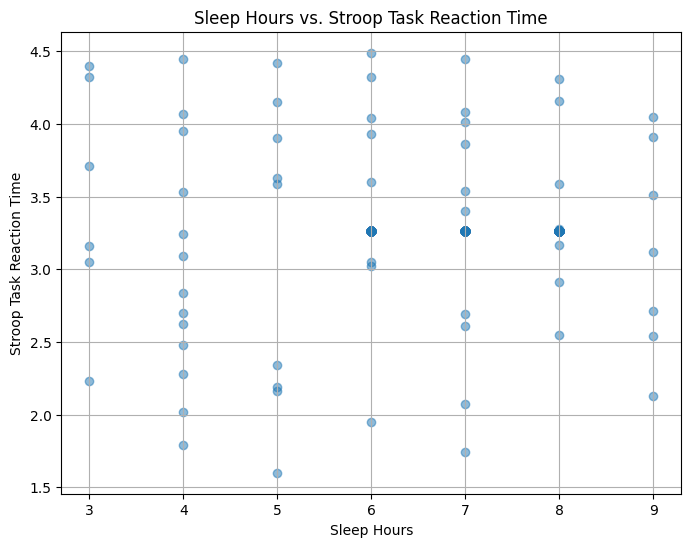

In [ ]:
#Scatter Plot: Sleep Hours vs. Stroop Task Reaction Time

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(sleep_combined['Sleep Hours'], sleep_combined['Stroop Task Reaction Time'], alpha=0.5)
plt.title('Sleep Hours vs. Stroop Task Reaction Time')
plt.xlabel('Sleep Hours')
plt.ylabel('Stroop Task Reaction Time')
plt.grid(True)
plt.show()


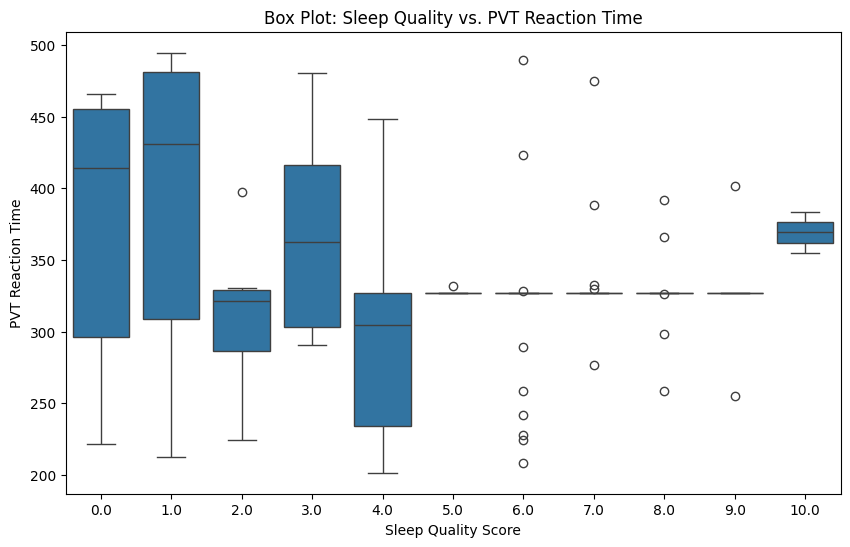

In [ ]:
#Box Plot: Sleep Quality vs. PVT Reaction Time
#Check reaction time distribution across different sleep quality levels

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Quality Score', y='PVT Reaction Time', data=sleep_combined)
plt.title('Box Plot: Sleep Quality vs. PVT Reaction Time')
plt.xlabel('Sleep Quality Score')
plt.ylabel('PVT Reaction Time')
plt.show()

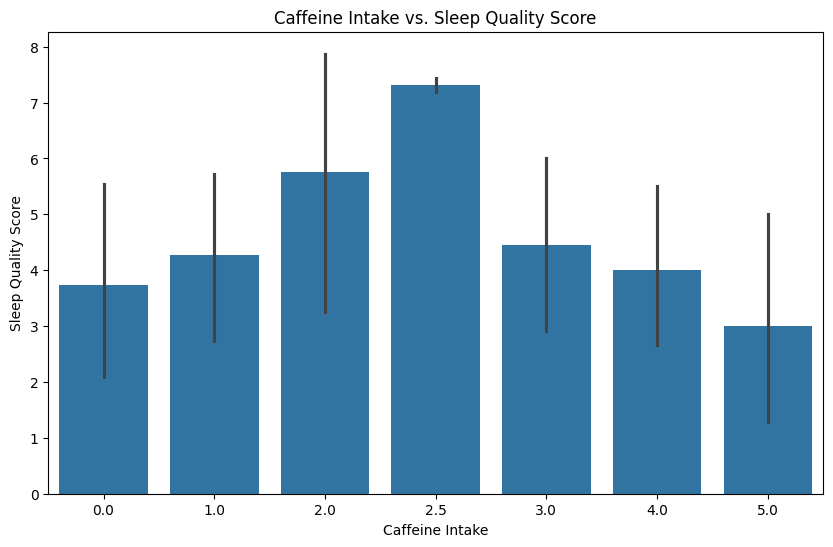

In [ ]:
#Bar Chart: Caffeine Intake vs. Sleep Quality Score
#to see if caffeine lowers sleep quality

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Caffeine Intake', y='Sleep Quality Score', data=sleep_combined)
plt.title('Caffeine Intake vs. Sleep Quality Score')
plt.xlabel('Caffeine Intake')
plt.ylabel('Sleep Quality Score')
plt.show()


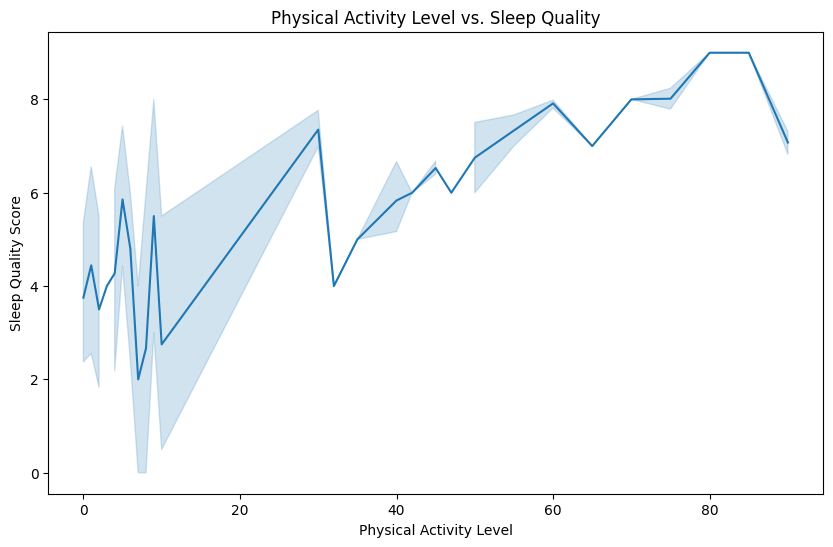

In [ ]:
#Physical Activity Level vs. Sleep Quality
#Check if higher activity improves sleep


plt.figure(figsize=(10, 6))
sns.lineplot(x='Physical Activity Level', y='Sleep Quality Score', data=sleep_combined)
plt.title('Physical Activity Level vs. Sleep Quality')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Quality Score')
plt.show()


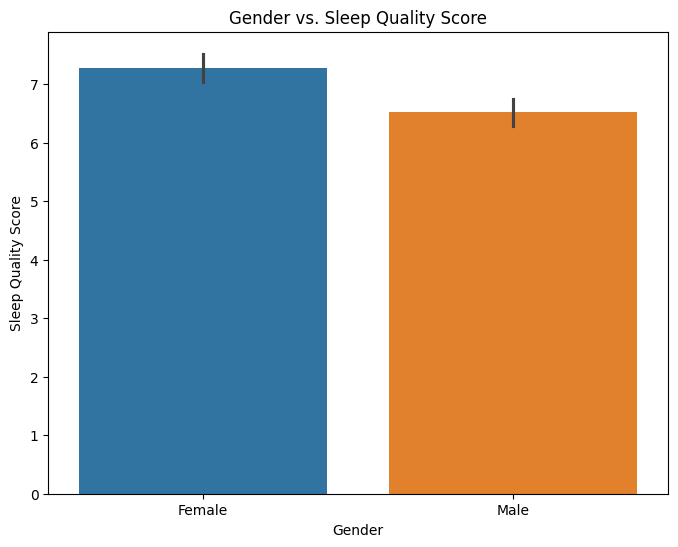

In [ ]:
#Grouped Bar Chart: Gender vs. Sleep Quality Score
#to compare male/female sleep patterns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Sleep Quality Score', data=sleep_combined, hue='Gender')
plt.title('Gender vs. Sleep Quality Score')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality Score')
plt.show()


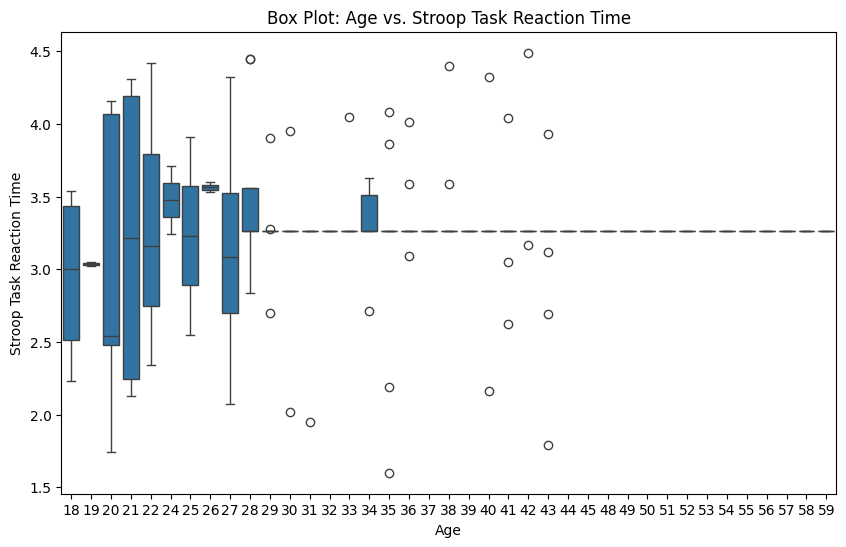

In [ ]:
# Box Plot: Age vs. Reaction Times
#to check if reaction time slows with age.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Stroop Task Reaction Time', data=sleep_combined)
plt.title('Box Plot: Age vs. Stroop Task Reaction Time')
plt.xlabel('Age')
plt.ylabel('Stroop Task Reaction Time')
plt.show()


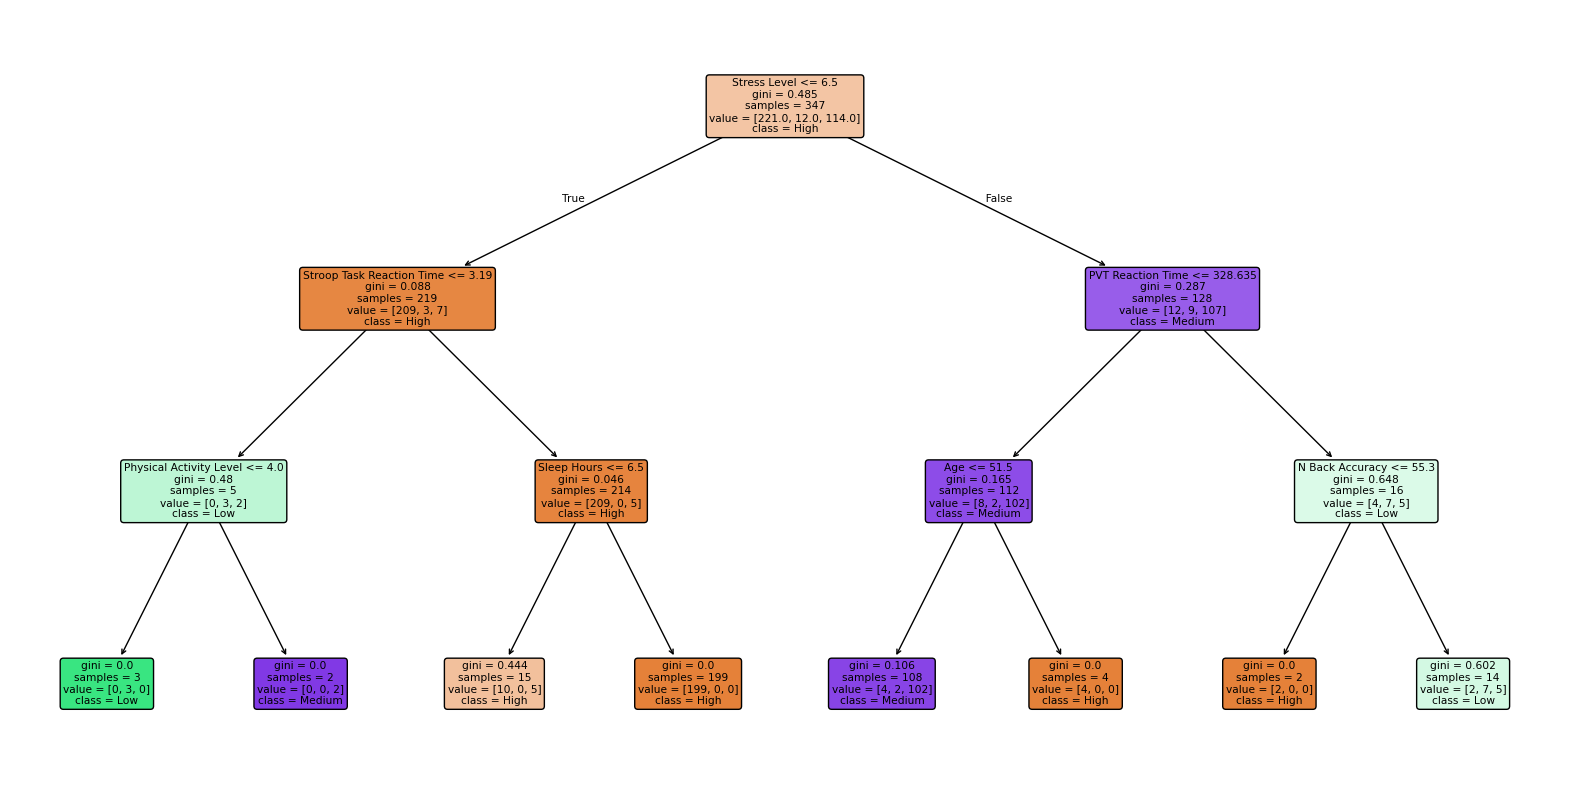

In [ ]:
# prompt: Decision Tree Plot: To show major lifestyle factors contributing to poor sleep

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming X_train_class, y_train_class are defined from previous code

# Initialize and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42) # Adjust max_depth as needed
dt_classifier.fit(X_train_class, y_train_class)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=X_train_class.columns,  # Use feature names from your training data
          class_names=dt_classifier.classes_,
          filled=True, rounded=True)
plt.show()


In [ ]:
# prompt: BMI Category Prediction:
# Classification Model → Random Forest, Decision Tree, or XGBoost.
# Food, Exercise & Sleep Suggestions:
# Rule-based Recommendations → Based on BMI, Sleep Quality, Stress Level, and Activity.
# 1.3 Model Training & Testing
# Train the model using historical data.
# Test the accuracy and optimize hyperparameters.

# Assuming X_train_class, y_train_class, and X_test_class are defined from previous code

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_class, y_train_class)
y_pred_dt = dt_classifier.predict(X_test_class)
accuracy_dt = accuracy_score(y_test_class, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt}")


Decision Tree Classifier Accuracy: 0.8505747126436781


In [ ]:
# prompt: Health Risk Prediction (Detecting Groups Prone to Poor Sleep & Cognition)
# Features: Sleep Quality, BMI, Stress, Caffeine, Physical Activity
# Models:
# Clustering for Grouping Users: K-Means, DBSCAN
# Risk Classification: Random Forest, SVM, Gradient Boosting

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load the preprocessed data
sleep_combined = pd.read_csv('cleaned.csv')

# Prepare the data for modeling
X = sleep_combined.drop('Sleep Quality Score', axis=1)
y = sleep_combined['Sleep Quality Score']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Categorize 'Sleep Quality Score' (example bins)
bins = [0, 3, 7, 10]
labels = ['Low', 'Medium', 'High']
y_categorized = pd.cut(y, bins=bins, labels=labels, include_lowest=True, right=False)

# Handle NaN values (replace with mode for the target variable)
y_categorized.fillna(y_categorized.mode()[0], inplace=True)

# Split data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_categorized, test_size=0.2, random_state=42
)

# Encode labels for XGBoost
label_encoder = LabelEncoder()
y_train_class_encoded = label_encoder.fit_transform(y_train_class)
y_test_class_encoded = label_encoder.transform(y_test_class)

# Train and evaluate Random Forest Classifier
model_classification = RandomForestClassifier(random_state=42)
model_classification.fit(X_train_class, y_train_class)
y_pred_class = model_classification.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Random Forest Classifier Accuracy: {accuracy}")


# Train and evaluate XGBoost Classifier
model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_class, y_train_class_encoded)
y_pred_xgb = model_xgb.predict(X_test_class)
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)
accuracy_xgb = accuracy_score(y_test_class, y_pred_xgb_labels)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb}")


Random Forest Classifier Accuracy: 0.8735632183908046


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:07:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Accuracy: 0.8735632183908046


In [ ]:
# prompt:  Estimating Cognitive Performance (Reaction Times & Accuracy)
# Features: Sleep Hours, Daytime Sleepiness, Sleep Quality, Stress, BMI, Age, Caffeine Intake
# Models:
# Stroop Task & PVT Reaction Time: Random Forest Regressor, XGBoost, Support Vector Regression (SVR)
# N-Back Accuracy & Emotion Regulation Score: Logistic Regression, Decision Trees, Neural Networks

# Assuming 'sleep_combined' DataFrame is already loaded and preprocessed
from sklearn.svm import SVR

# ... (Previous code)

# Prepare data for SVR model
X_svr = sleep_combined.drop(['PVT Reaction Time', 'Stroop Task Reaction Time'], axis=1)
y_pvt = sleep_combined['PVT Reaction Time']
y_stroop = sleep_combined['Stroop Task Reaction Time']


# Convert categorical features to numerical using one-hot encoding
X_svr = pd.get_dummies(X_svr, drop_first=True)


# Split data into training and testing sets for PVT
X_train_pvt, X_test_pvt, y_train_pvt, y_test_pvt = train_test_split(X_svr, y_pvt, test_size=0.2, random_state=42)


# Split data into training and testing sets for Stroop
X_train_stroop, X_test_stroop, y_train_stroop, y_test_stroop = train_test_split(X_svr, y_stroop, test_size=0.2, random_state=42)



# Train SVR model for PVT
svr_pvt = SVR(kernel='rbf') # You can experiment with different kernels
svr_pvt.fit(X_train_pvt, y_train_pvt)
y_pred_pvt = svr_pvt.predict(X_test_pvt)
mse_pvt = mean_squared_error(y_test_pvt, y_pred_pvt)
print(f"SVR Model (PVT) Mean Squared Error: {mse_pvt}")

# Train SVR model for Stroop
svr_stroop = SVR(kernel='rbf')
svr_stroop.fit(X_train_stroop, y_train_stroop)
y_pred_stroop = svr_stroop.predict(X_test_stroop)
mse_stroop = mean_squared_error(y_test_stroop, y_pred_stroop)
print(f"SVR Model (Stroop) Mean Squared Error: {mse_stroop}")


SVR Model (PVT) Mean Squared Error: 0.01335137501457082
SVR Model (Stroop) Mean Squared Error: 0.016933796835943978


In [35]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from xgboost import XGBClassifier
import pandas as pd # Make sure pandas is imported

# Prepare the data for modeling
X = sleep_combined.drop('Sleep Quality Score', axis=1)
y = sleep_combined['Sleep Quality Score']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection based on the nature of 'Sleep Quality Score' (continuous or categorical)

# 1. Regression (if 'Sleep Quality Score' is treated as continuous)
model_regression = RandomForestRegressor(random_state=42) # Or Linear Regression
model_regression.fit(X_train, y_train)
y_pred_regression = model_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred_regression)
print(f"Regression Model (Random Forest Regressor) Mean Squared Error: {mse}")


# 2. Classification (if 'Sleep Quality Score' is treated as categorical - Low/Medium/High)
# Assuming you have defined categories for 'Sleep Quality Score'
# For example:
bins = [0, 3, 7, 10]  # Example bins for Low, Medium, High
labels = ['Low', 'Medium', 'High']
y_categorized = pd.cut(y, bins=bins, labels=labels, include_lowest=True, right=False)

# Impute NaN values in X and y_categorized before splitting
X.fillna(X.median(), inplace=True)  # Fill NaN in features with median
y_categorized.fillna(y_categorized.mode()[0], inplace=True)  # Fill NaN in target with mode

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_categorized, test_size=0.2, random_state=42)

# Convert string labels to numerical labels using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_class_encoded = label_encoder.fit_transform(y_train_class)
y_test_class_encoded = label_encoder.transform(y_test_class)


model_classification = RandomForestClassifier(random_state=42) # Or Logistic Regression, XGBoost
model_classification.fit(X_train_class, y_train_class)
y_pred_class = model_classification.predict(X_test_class)

accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Model (Random Forest Classifier) Accuracy: {accuracy}")


model_xgb = XGBClassifier(random_state = 42, use_label_encoder =False, eval_metric = 'logloss')
# Fit the XGBoost model with encoded target variable
model_xgb.fit(X_train_class, y_train_class_encoded)
y_pred_xgb = model_xgb.predict(X_test_class)
# Inverse transform the predictions to get original labels
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)
accuracy_xgb = accuracy_score(y_test_class, y_pred_xgb_labels)  # Calculate accuracy using original labels
print(f"XGBoost Classifier Accuracy: {accuracy_xgb}")

Regression Model (Random Forest Regressor) Mean Squared Error: 2.3916563218390805
Classification Model (Random Forest Classifier) Accuracy: 0.8735632183908046
XGBoost Classifier Accuracy: 0.8735632183908046


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:28:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# prompt: create a new csv with just factors like sleep hours ,sleep quality score ,age,gender,caffeine intake ,physical activity ,sleep hours and stress level

import pandas as pd

# Load the preprocessed DataFrame (assuming it's named 'sleep_combined')
sleep_combined = pd.read_csv('cleaned.csv')

# Select the desired columns
selected_columns = ['Sleep Hours', 'Sleep Quality Score', 'Age', 'Gender', 'Caffeine Intake', 'Physical Activity Level', 'Stress Level']
new_df = sleep_combined[selected_columns]

# Save the new DataFrame to a CSV file
new_df.to_csv('sleep_factors.csv', index=False)


In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("cleaned.csv")  # Use your updated dataset

# Select only the required 6 features
features = ["Sleep Hours", "Age", "Gender", "Caffeine Intake", "Physical Activity Level", "Stress Level"]
X = df[features]

# Convert gender to numerical (if it's categorical)
# Changed 'gender' to 'Gender' to match the actual column name
X["Gender"] = X["Gender"].map({"Male": 0, "Female": 1})

# Target variable
# Changed 'sleep_quality_score' to 'Sleep Quality Score' to match the actual column name
y = df["Sleep Quality Score"]  # Adjust based on your dataset

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train new model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the new model
joblib.dump(model, "sleep_quality_model.pkl")
print("New model trained and saved successfully!")

<ipython-input-29-ebd209697d3d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].map({"Male": 0, "Female": 1})


New model trained and saved successfully!


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, "sleep_quality_model_1.pkl")

# Download the model file
from google.colab import files
files.download("sleep_quality_model_1.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
import numpy as np

# Load your trained model
model = joblib.load("sleep_quality_model.pkl")

# Define a test input (same as what you send to FastAPI)
test_input = np.array([[7.5, 25, 0, 2, 3, 5]])  # Adjust based on your features

# Predict
prediction = model.predict(test_input)
print("Predicted Sleep Quality Score:", prediction[0])


Predicted Sleep Quality Score: 7.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
